# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

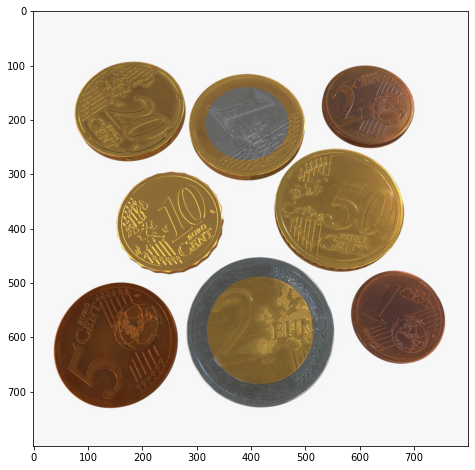

In [2]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

In [46]:
# Convert the image above to grayscale
gray_coin = cv2.cvtColor(color_coins,cv2.COLOR_BGR2GRAY)
rel, th   = cv2.threshold(gray_coin,167,255,cv2.THRESH_BINARY_INV) 

# Apply some gaussian blur to it (try differente size kernels)
th = cv2.GaussianBlur(th,(3,3),0)

# Apply Canny to find edges and display the image 



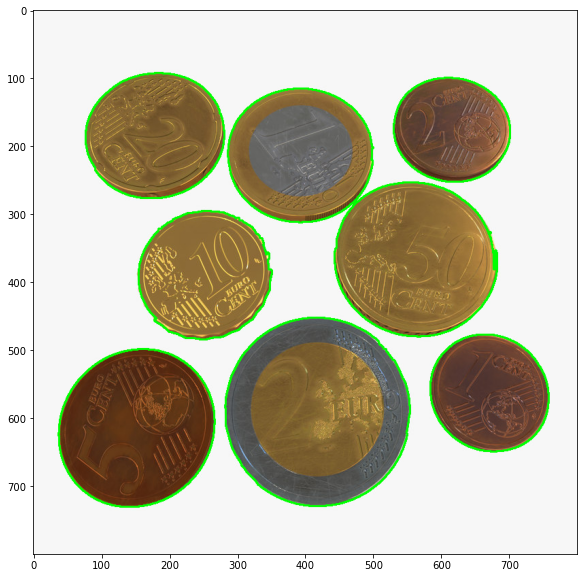

In [47]:
coin_copy = color_coins.copy()
# Now find the contours on the image where you applied canny as well as in the grayscale image
contours, im2 = cv2.findContours(th,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Draw the contours on the images (or better yet on copies of the images)
draw = cv2.drawContours(coin_copy, contours,-1,(0,255,0),2)
# Display the images, how does it look like?
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(draw, cv2.COLOR_BGR2RGB))

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [48]:
# print the number of contours that has been found
len(contours)

8

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

3103


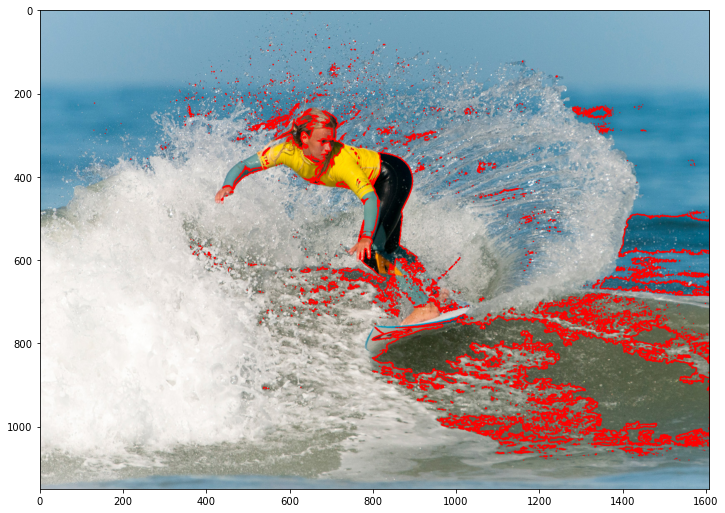

In [75]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise
surfer = cv2.imread('img/Surfers-Paradise-Surfer.jpg')
gray_surfer = cv2.cvtColor(surfer,cv2.COLOR_BGR2GRAY)
#gray_surfer = cv2.GaussianBlur(gray_surfer,(3,33),0)
#gray_surfer = cv2.Canny(gray_surfer, 2,5)
_, s_th   = cv2.threshold(gray_surfer, 97,215, cv2.THRESH_BINARY_INV)
s_contros , _ = cv2.findContours(s_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
s_draw = cv2.drawContours(surfer, s_contros,-1,(0,0,255),2)
print(len(s_contros))
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(s_draw,cv2.COLOR_BGR2RGB))

## Sorting Contours

### By area

In [76]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [77]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var
sorted_cons = get_contour_areas(contours)

In [78]:
# Print the contour areas to screen
print(sorted_cons)

[41799.5, 23560.5, 59165.5, 28865.5, 42354.5, 33194.5, 20677.5, 29597.0]


In [81]:
# Now sort the areas by biggest to smallest and print the sorted areas
sorted_cons = sorted(sorted_cons,reverse=True)
sorted_cons

[59165.5, 42354.5, 41799.5, 33194.5, 29597.0, 28865.5, 23560.5, 20677.5]

[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [82]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas
sorted_cons = sorted(sorted_cons)
sorted_cons

[20677.5, 23560.5, 28865.5, 29597.0, 33194.5, 41799.5, 42354.5, 59165.5]

In [87]:
# Filter out only the 5 biggest contours and print them
top_5 = sorted(contours, key=cv2.contourArea)[-5:]
top_5

[array([[[179,  92]],
 
        [[178,  93]],
 
        [[177,  93]],
 
        ...,
 
        [[182,  92]],
 
        [[181,  92]],
 
        [[180,  92]]], dtype=int32),
 array([[[383, 115]],
 
        [[382, 116]],
 
        [[381, 116]],
 
        ...,
 
        [[386, 115]],
 
        [[385, 115]],
 
        [[384, 115]]], dtype=int32),
 array([[[154, 498]],
 
        [[153, 499]],
 
        [[152, 499]],
 
        ...,
 
        [[157, 498]],
 
        [[156, 498]],
 
        [[155, 498]]], dtype=int32),
 array([[[544, 253]],
 
        [[543, 254]],
 
        [[542, 254]],
 
        ...,
 
        [[547, 253]],
 
        [[546, 253]],
 
        [[545, 253]]], dtype=int32),
 array([[[404, 452]],
 
        [[403, 453]],
 
        [[402, 453]],
 
        ...,
 
        [[407, 452]],
 
        [[406, 452]],
 
        [[405, 452]]], dtype=int32)]

[Hint](# "Just slice the array!") 

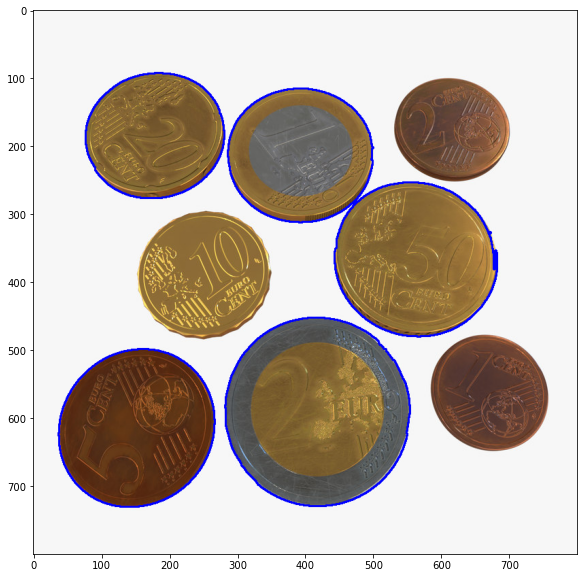

In [89]:
# Now in a clean image draw the contours you just filtered out and display it
cop = color_coins.copy()
cop_draw = cv2.drawContours(cop,top_5,-1,(255,0,0),2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cop_draw, cv2.COLOR_BGR2RGB))

In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [90]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [91]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right
l_r_contours = get_contour_x_center_coordinate(contours)

TypeError: Expected Ptr<cv::UMat> for argument 'contour'

In [ ]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
